#**Prediction of English Language Proficiency Assessments for California (ELPAC) Scores Using Machine Learning Approach**

###**TEAM MEMBERS: TEAM 3:  EMMA OO, LUKE AWINO, OSCAR GIL**

###**Applied Data Science Master’s Program, Shiley Marcos School of Engineering / University of San Diego**

**DATE:  11/12/2022**


In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sqlite3



import warnings 
warnings.filterwarnings(action= 'ignore')

###**DATA ACQUISITION**

###NEED TO ADD DATA ACQUISITION SUMMARY SENTENCE**

In [2]:
# Import file
df = pd.read_csv('https://raw.githubusercontent.com/OscarG-DataSci/ADS-599B/main/Data%20Folder/elpac.csv')

In [3]:
df.head()

,AcademicYear,Stu_deID,School_deID,GradeLevel,DOB,TestAge,StudentGender,StudentEthnicity,Special_Education,Homeless,SocioEconomically,TestDayName,TestDate,OverallScore,OverallLevel,ExpectedAttendanceDays,DaysAttended,AttendedPct,EnrolledPct,GradeEnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity
0,2017-2018,0,3,1,2011-07-04,6.828340,F,Hispanic,N,Y,Y,Wednesday,2018-05-02,1503,4,180.0,175.0,0.972222,1.0,1.999999,1.972222,F,4,Hispanic
1,2017-2018,1,5,4,2008-07-28,9.631957,M,Hispanic,N,N,Y,Friday,2018-03-16,1535,3,180.0,168.0,0.933333,1.0,4.999999,4.933333,F,2,Multiple
2,2017-2018,3,3,4,2008-05-06,9.905748,M,Hispanic,Y,N,N,Monday,2018-04-02,1480,2,180.0,175.0,0.972222,1.0,4.999999,4.972222,F,18,White
3,2017-2018,4,3,0,2012-04-13,6.108271,M,Hispanic,N,N,Y,Wednesday,2018-05-23,1461,4,180.0,125.0,0.694444,1.0,0.999999,0.694444,F,1,White
4,2017-2018,5,7,0,2011-09-25,6.664066,M,Hispanic,N,N,Y,Friday,2018-05-25,1357,1,180.0,165.0,0.916667,1.0,0.999999,0.916667,F,17,Hispanic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11628 entries, 0 to 11627
Data columns (total 24 columns):
AcademicYear                  11628 non-null object
Stu_deID                      11628 non-null int64
School_deID                   11628 non-null int64
GradeLevel                    11628 non-null int64
DOB                           11628 non-null object
TestAge                       9469 non-null float64
StudentGender                 11628 non-null object
StudentEthnicity              11628 non-null object
Special_Education             11628 non-null object
Homeless                      11628 non-null object
SocioEconomically             11628 non-null object
TestDayName                   9469 non-null object
TestDate                      9469 non-null object
OverallScore                  11628 non-null int64
OverallLevel                  11628 non-null int64
ExpectedAttendanceDays        11628 non-null float64
DaysAttended                  11628 non-null float64
AttendedPct 

In [5]:
# Convert date fields to datetime
df['DOB'] =  pd.to_datetime(df.DOB)
df['TestDate'] =  pd.to_datetime(df.TestDate)

In [6]:
df.head(3)

,AcademicYear,Stu_deID,School_deID,GradeLevel,DOB,TestAge,StudentGender,StudentEthnicity,Special_Education,Homeless,SocioEconomically,TestDayName,TestDate,OverallScore,OverallLevel,ExpectedAttendanceDays,DaysAttended,AttendedPct,EnrolledPct,GradeEnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity
0,2017-2018,0,3,1,2011-07-04,6.828340,F,Hispanic,N,Y,Y,Wednesday,2018-05-02,1503,4,180.0,175.0,0.972222,1.0,1.999999,1.972222,F,4,Hispanic
1,2017-2018,1,5,4,2008-07-28,9.631957,M,Hispanic,N,N,Y,Friday,2018-03-16,1535,3,180.0,168.0,0.933333,1.0,4.999999,4.933333,F,2,Multiple
2,2017-2018,3,3,4,2008-05-06,9.905748,M,Hispanic,Y,N,N,Monday,2018-04-02,1480,2,180.0,175.0,0.972222,1.0,4.999999,4.972222,F,18,White


####**CHECK FOR MISSING VALUES, DUPLICATES, AND SCORES WITH ZERO VALUES**

###**MISSING VALUES**

In [7]:
# Missing data value counts by AcademicYear
# Most missing data is from when the pandemic quarantine went into effect, March, 2020
# The 2020-2021 school year also has many students who did not test due to distance learning, making it difficult to test all students
df[(df.TestDate.isna() == True)]['AcademicYear'].value_counts().sort_index(ascending=False)

2020-2021     858
2019-2020    1255
2018-2019      46
Name: AcademicYear, dtype: int64

In [8]:
# Initial view of shape and missing data
print("Shape: ",df.shape,"\n")

# Columns missing data
df.isnull().sum().to_frame(name='Missing').query('Missing > 0')

Shape:  (11628, 24) 



,Missing
TestAge,2159
TestDayName,2159
TestDate,2159
AttendedPct,3
GradeAttendedPct,3


In [9]:
# Re-load data omitting missing data
df = df[(df.TestDate.isna() == False)]

print("Shape: ",df.shape,"\n")

# Columns missing data
df.isnull().sum().to_frame(name='Missing').query('Missing > 0')

Shape:  (9469, 24) 



,Missing
AttendedPct,2
GradeAttendedPct,2


In [10]:
# Repeat...to verify no more data is missing
df = df[(df.AttendedPct.isna() == False)]

print("Shape: ",df.shape,"\n")

# Columns missing data
df.isnull().sum().to_frame(name='Missing').query('Missing > 0')

Shape:  (9467, 24) 



,Missing


####**SCORES WITH 0 VALUES**

In [11]:
# omit records where scores are zero
df = df.query("OverallScore != 0")
df.shape

(9460, 24)

####**DUPLICATES**

In [12]:
#check for duplicated rows in the dataset
duplicated_rows = df[df.duplicated()] 
print("number of duplicate rows: ", duplicated_rows.shape)

number of duplicate rows:  (0, 24)


####**STANDARDIZATION OF OVERALLSCORE VALUES**

*Since the OverallScore values range differently between grade levels, standardization was performed to obtain the normal distribution. 

In [13]:
# View ranges of OverallScore by grade level, to determine if they are all uniform.
df.groupby('GradeLevel').agg({'OverallScore': ['min', 'max']})

OverallScore      
                    min   max
GradeLevel                   
0                  1150  1700
1                  1150  1627
2                  1150  1700
3                  1150  1672
4                  1150  1731
5                  1150  1731
6                  1150  1729

In [14]:
# to Standardize OverallScore values, as the ranges are different between grade levels
grdLevel_describe = []

for g in range(len(pd.DataFrame(df.GradeLevel.unique()))):

    grdLevel_describe.append({'GradeLevel': g,
                             'OverallScoreMin': pd.DataFrame(df.query("GradeLevel == @g").OverallScore.describe().to_list()).iloc[3].values[0],
                             'OverallScoreMax': pd.DataFrame(df.query("GradeLevel == @g").OverallScore.describe().to_list()).iloc[7].values[0]})   

pd.DataFrame(grdLevel_describe) 

,GradeLevel,OverallScoreMin,OverallScoreMax
0,0,1150.0,1700.0
1,1,1150.0,1627.0
2,2,1150.0,1700.0
3,3,1150.0,1672.0
4,4,1150.0,1731.0
5,5,1150.0,1731.0
6,6,1150.0,1729.0


In [15]:
# Bring in min and max columns to df dataframe
df = df.merge(pd.DataFrame(grdLevel_describe) , left_on=('GradeLevel'), right_on=('GradeLevel'))

In [16]:
# Standardize Overall Score
df['OverallScoreStd'] = (df.OverallScore - df.OverallScoreMin) / (df.OverallScoreMax - df.OverallScoreMin)

In [17]:
# Confirm min and max OverallScore standardized values range from 0 to 1 for each grade level
df.groupby('GradeLevel').agg({'OverallScoreStd': ['min', 'max']})

OverallScoreStd     
                       min  max
GradeLevel                     
0                      0.0  1.0
1                      0.0  1.0
2                      0.0  1.0
3                      0.0  1.0
4                      0.0  1.0
5                      0.0  1.0
6                      0.0  1.0

###**Queries of Number of Students with Minimum OverallScore Per Academic Year**

In [18]:
# There are several students who should a result along the zero score line, on scatter plots.
# These are the student counts whose OverallScore equals the minimum score, by AcademicYear
df.query("OverallScore == @df.OverallScoreMin").AcademicYear.value_counts().sort_index()

2017-2018    12
2018-2019    10
2019-2020     3
2020-2021    15
2021-2022     1
Name: AcademicYear, dtype: int64

In [19]:
# Drop columns used for the OverallScoreStd, which are no longer necessary
df = df.drop(['OverallScoreMin', 'OverallScoreMax'], axis=1)
df.shape

(9460, 25)

In [20]:
# Total ELPAC Assessments; total times the student student has tested
total_assessments = pd.DataFrame(df.Stu_deID.value_counts())
total_assessments.columns = ['TotalAssessments']

# Add column TotalAssessments to data frame
df = df.merge(total_assessments, left_index=True, right_index=True)

###**DATA VISUALIZATION**

####**CORRELATION AMONG FEATURES**

In [21]:
# Identify features that are object dtype, to create dummy variables for
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4314 entries, 0 to 4752
Data columns (total 9 columns):
AcademicYear         4314 non-null object
StudentGender        4314 non-null object
StudentEthnicity     4314 non-null object
Special_Education    4314 non-null object
Homeless             4314 non-null object
SocioEconomically    4314 non-null object
TestDayName          4314 non-null object
TeacherGender        4314 non-null object
TeacherEthnicity     4314 non-null object
dtypes: object(9)
memory usage: 337.0+ KB


In [22]:
# Create dummy values from 'object' data types to get correlation values
df2 = pd.get_dummies(df, columns=['AcademicYear', 'StudentGender', 'StudentEthnicity', 'Special_Education', 'Homeless', 'SocioEconomically', 'TestDayName',
                                  'TeacherGender','TeacherEthnicity'])

In [23]:
# Correlation for dummy variables for Overall Score
cor = pd.DataFrame(df2.corrwith(df2['OverallScore']))
cor.columns = ['Correlation']
cor.head(20).sort_values('Correlation', ascending=False).style.bar(align="mid", color=["red", "lightgreen"])

,Correlation
OverallScore,1
OverallScoreStd,0.923123
OverallLevel,0.74585
TestAge,0.497669
GradeAttendedPct,0.484526
GradeEnrolledPct,0.481236
GradeLevel,0.479179
DaysAttended,0.165604
AttendedPct,0.151066
AcademicYear_2020-2021,0.114124


In [24]:
# Correlation for dummy variables for Overall Level
cor = pd.DataFrame(df2.corrwith(df2['OverallLevel']))
cor.columns = ['Correlation']
cor.head(20).sort_values('Correlation', ascending=False).style.bar(align="mid", color=["red", "lightgreen"])

,Correlation
OverallLevel,1
OverallScoreStd,0.746582
OverallScore,0.74585
AcademicYear_2017-2018,0.215719
DaysAttended,0.150201
AttendedPct,0.126421
ExpectedAttendanceDays,0.113669
EnrolledPct,0.113669
School_deID,0.073779
TestAge,0.0527092


<AxesSubplot:>

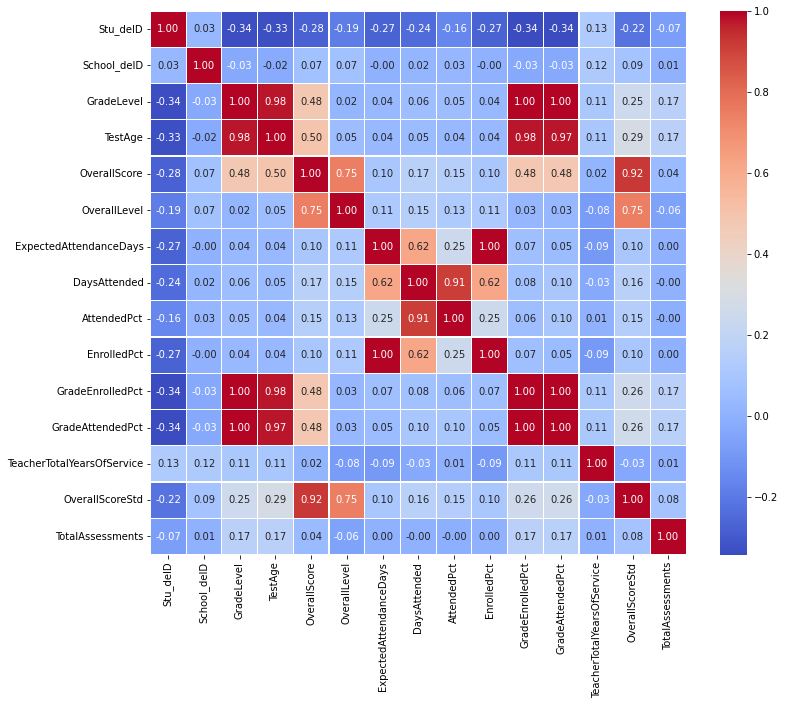

In [25]:
# Correlation Matrix
pearsoncorr = df.corr(method='pearson')

plt.figure(figsize= (12,10))

sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='coolwarm',
            fmt=".2f",
            annot=True,
            linewidth=0.25)

In [26]:
#Split numerical and categorical dataframes for visualization purpose

#for num_df, only extract the useful columns and drop the columns such as 'Stu_deID'

num_df = df[['School_deID','GradeLevel','TestAge','OverallLevel','ExpectedAttendanceDays','DaysAttended',
           'AttendedPct', 'EnrolledPct' ,'GradeEnrolledPct', 'GradeAttendedPct','TeacherTotalYearsOfService',
           'OverallScoreStd']]

#for cat_df, keep only the suitable features for visualization 
cat_df = df[['AcademicYear','StudentGender','StudentEthnicity','Special_Education','Homeless','SocioEconomically','TestDayName',
           'TeacherGender','TeacherEthnicity']]

####**DISTRIBUTION BETWEEN CATEGORICAL VARIABLES**

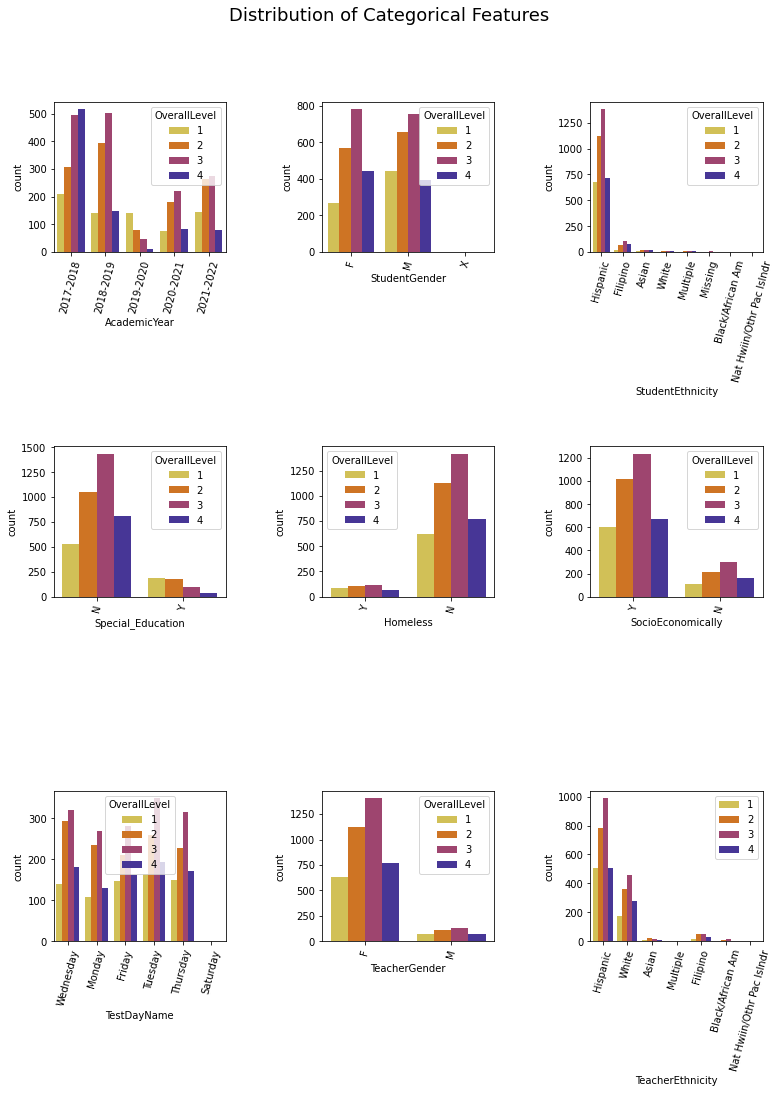

In [27]:
fig , ax = plt.subplots(3,3, figsize = (12,16))     # set up 2 x 2 frame count plot with figsize 10 x 10
fig.suptitle("Distribution of Categorical Features", fontsize=18)

for i , subplots in zip (cat_df, ax.flatten()):
  g = sns.countplot(cat_df[i],hue = df['OverallLevel'],ax = subplots, palette = 'CMRmap_r')
  g.set_xticklabels(labels=cat_df[i].unique(), rotation= 75)


fig.tight_layout(pad= 5.0)
plt.legend(loc = 'upper right')
plt.show()

####**DISTRIBUTION PLOTS OF NUMERICAL VARIABLES**


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


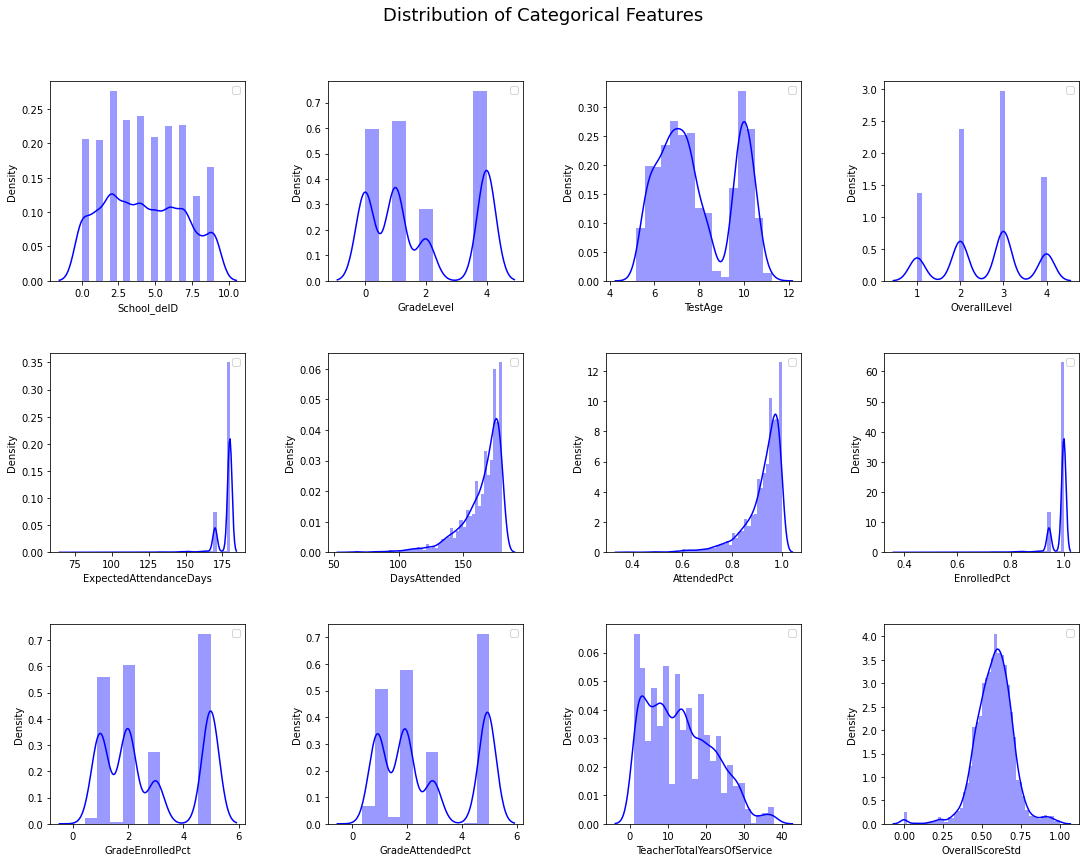

In [28]:
fig , ax = plt.subplots(3,3, figsize = (16,16))     
fig.suptitle("Distribution of Categorical Features", fontsize=18)

for i, column in enumerate(num_df, 1):
    plt.subplot(4, 4, i)
    sns.distplot(x=num_df[column], color = 'blue') 
    plt.legend() 
    plt.xlabel(column)
    fig.tight_layout(pad=4.0)

In [29]:
#create dataframes for the teachers
tenured = df.loc[df.TeacherTotalYearsOfService >= 10]
tenured['tenured']= tenured.TeacherTotalYearsOfService
untenured = df.loc[df.TeacherTotalYearsOfService <= 9]
untenured['untenured']= untenured.TeacherTotalYearsOfService
# tenured['tenured_teacher']=tenured.TeacherTotalYearsofService

Text(0.5, 0, 'Years of Teaching')

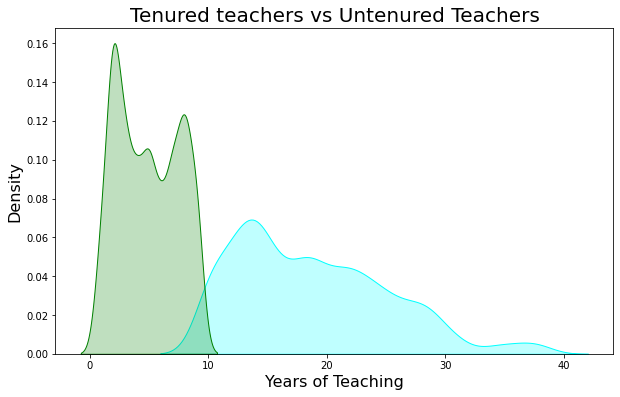

In [30]:


plt.figure(figsize=(10,6))
p1=sns.kdeplot(tenured['tenured'], shade=True, color="aqua")
p1=sns.kdeplot(untenured['untenured'], shade=True, color="g")
plt.title('Tenured teachers vs Untenured Teachers', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Years of Teaching', fontsize=16)

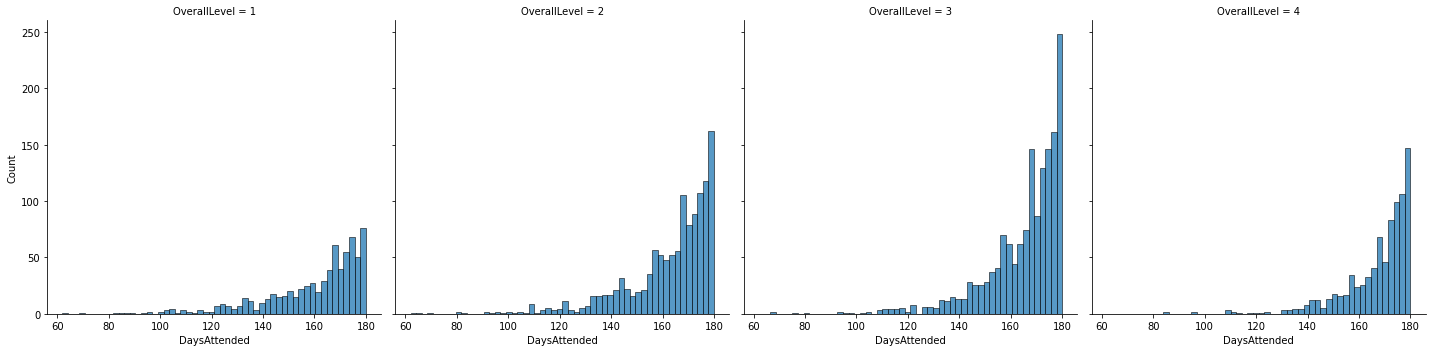

In [31]:
#Teacher years of service and Ethinicity
# sns.displot(df, x=df.DaysAttended, hue=df.OverallLevel, kind="kde", fill=True)
sns.displot(df, x=df.DaysAttended, col=df.OverallLevel)

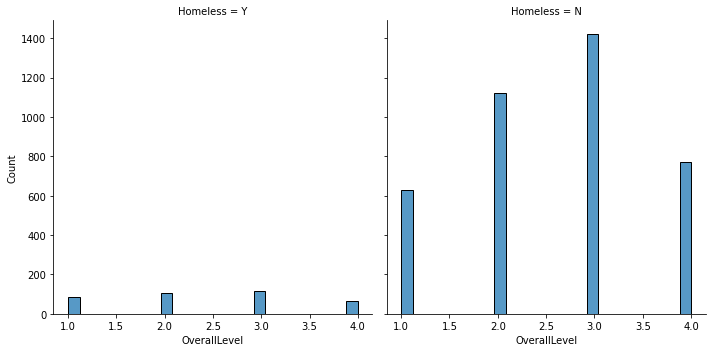

In [32]:
sns.displot(df, x=df.OverallLevel, col=df.Homeless)

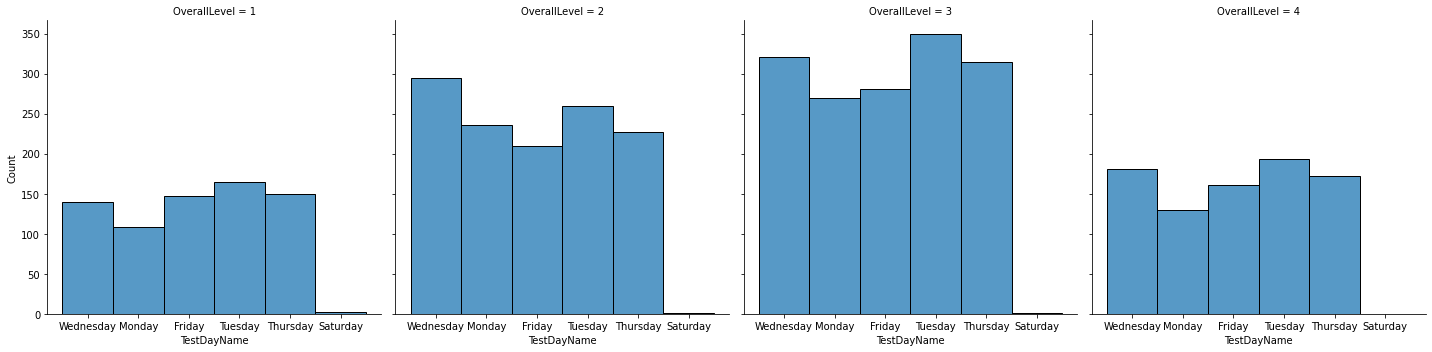

In [33]:
sns.displot(df, x=df.TestDayName, col=df.OverallLevel)

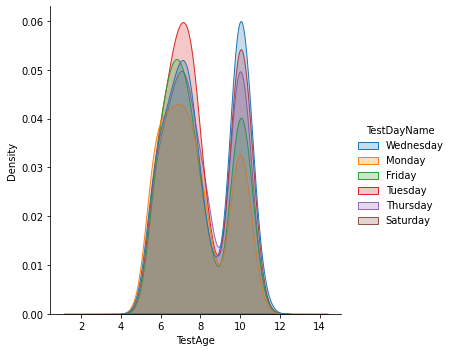

In [34]:
sns.displot(df, x=df.TestAge, hue=df.TestDayName, kind="kde", fill=True)

<AxesSubplot:xlabel='OverallLevel', ylabel='StudentEthnicity'>

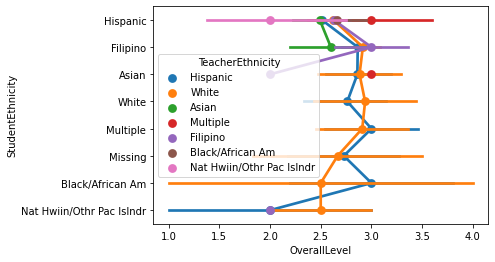

In [35]:
sns.pointplot(data=df, x=df.OverallLevel, y=df.StudentEthnicity, hue=df.TeacherEthnicity)

<AxesSubplot:xlabel='OverallLevel', ylabel='TestAge'>

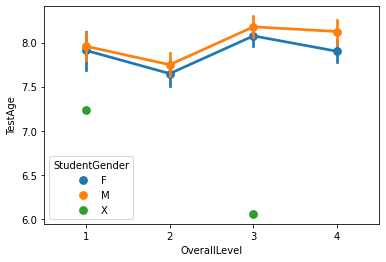

In [36]:
sns.pointplot(data=df, x=df.OverallLevel, y=df.TestAge, hue=df.StudentGender)

In [37]:
sns.distplot(df, x=df.OverallLevel, y=df.DaysAttended, hue=df.StudentGender)

TypeError: distplot() got an unexpected keyword argument 'y'

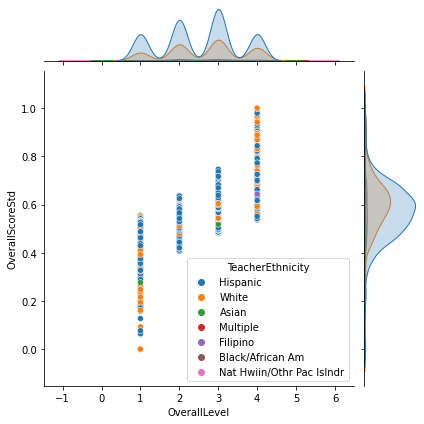

In [ ]:
# sns.jointplot(data=df, x=df.OverallLevel, y=df.DaysAttended, hue=df.StudentGender)
sns.jointplot(data=df, x=df.OverallLevel, y=df.OverallScoreStd, hue=df.TeacherEthnicity)

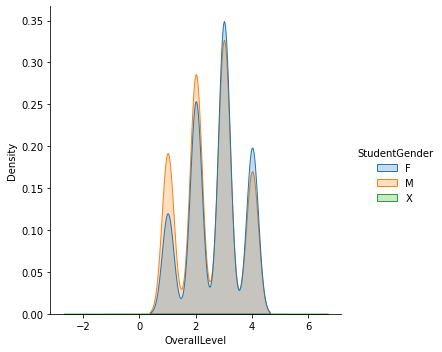

In [ ]:
sns.displot(df, x=df.OverallLevel, hue=df.StudentGender, kind="kde", fill=True)

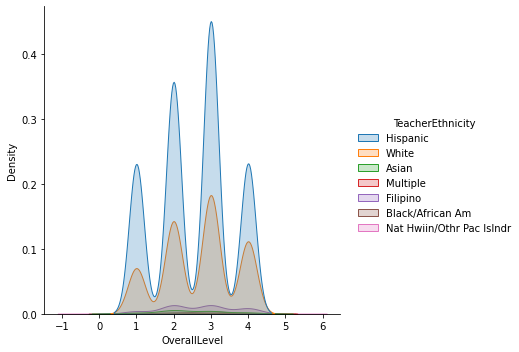

In [ ]:
sns.displot(df, x=df.OverallLevel, hue=df.TeacherEthnicity, kind="kde", fill=True)

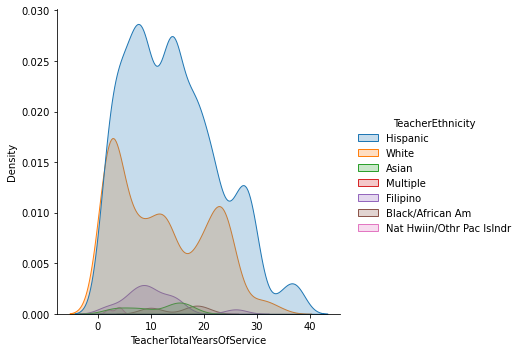

In [ ]:
sns.displot(df, x=df.TeacherTotalYearsOfService, hue=df.TeacherEthnicity, kind="kde", fill=True)

####**STUDENT SCORES BY GRADE LEVEL**

GradeLevel      0    1    2    4
OverallLevel                    
1             170  244   37  261
2             405  375   82  366
3             398  353  193  593
4             171  229  226  211


<Figure size 432x288 with 0 Axes>

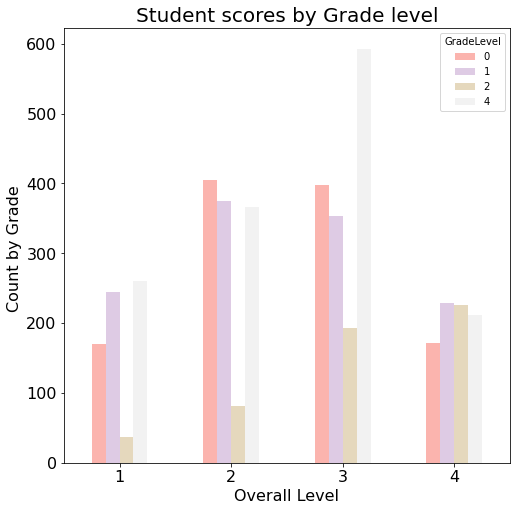

In [ ]:
#Crosstab for Student scores by Grade Level
test =  pd.crosstab(index=df.OverallLevel, columns=df.GradeLevel)
print(test)
#plot the figure
fig = plt.figure()
temp = test.plot.bar(colormap="Pastel1", fontsize=16, figsize=(8,8), rot=0) #https://matplotlib.org/stable/tutorials/colors/colormaps.html#sequential
temp = plt.title('Student scores by Grade level', fontsize=20)
temp = plt.ylabel('Count by Grade ', fontsize=16)
temp = plt.xlabel('Overall Level', fontsize=16)

In [ ]:
ethnicity =  pd.crosstab(index=df.StudentEthnicity, columns=df.OverallLevel)
print(ethnicity)
ethnicity.sum(axis=1)

OverallLevel                 1     2     3    4
StudentEthnicity                               
Asian                        5    15    18   17
Black/African Am             2     2     1    4
Filipino                    20    71   106   81
Hispanic                   677  1118  1383  713
Missing                      3     3     7    4
Multiple                     0     8     7    7
Nat Hwiin/Othr Pac Islndr    1     2     2    0
White                        4     9    13   11


StudentEthnicity
Asian                          55
Black/African Am                9
Filipino                      278
Hispanic                     3891
Missing                        17
Multiple                       22
Nat Hwiin/Othr Pac Islndr       5
White                          37
dtype: int64

In [ ]:
day =  pd.crosstab(index=df.TestDayName, columns=df.SocioEconomically)
print(day)

SocioEconomically    N    Y
TestDayName                
Friday             140  659
Monday             134  610
Saturday             2    2
Thursday           169  695
Tuesday            164  803
Wednesday          176  760


In [ ]:
gender_testday=  pd.crosstab(index=df.TestDayName, columns=df.StudentGender)
print(gender_testday)

StudentGender    F    M  X
TestDayName               
Friday         372  426  1
Monday         335  409  0
Saturday         1    3  0
Thursday       417  447  0
Tuesday        475  492  0
Wednesday      466  469  1


In [48]:
Special_education_ethnicity =  pd.crosstab(index=df.StudentEthnicity, columns=df.Special_Education)
print(Special_education_ethnicity)


Special_Education             N    Y
StudentEthnicity                    
Asian                        54    1
Black/African Am              8    1
Filipino                    254   24
Hispanic                   3429  462
Missing                      17    0
Multiple                     21    1
Nat Hwiin/Othr Pac Islndr     3    2
White                        34    3


###**FEATURE ENGINEERING**

####**DISTRIBUTION OF TARGET CLASSES: OVERALLLEVEL**


<AxesSubplot:xlabel='OverallLevel', ylabel='count'>

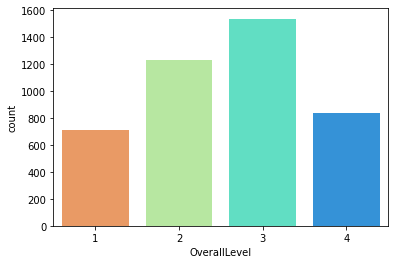

In [49]:
fig_szie=(12,8)
sns.countplot(df['OverallLevel'], data = df, palette = 'rainbow_r')

A slight class-imbalance was observed amaong the scores.

Downsampling will be performed for level 2 and 3 as reference to level 4 count.

A new data balanced dataset named 'bal_df' will be trained with models to see the accuracy performance improvement. 


In [50]:
#downsamples level 2 and 3 as reference to level 4

lev_0 = df[df['OverallLevel'] == 0]
lev_1 = df[df['OverallLevel'] == 1]
lev_2 = df[df['OverallLevel'] == 2]
lev_3 = df[df['OverallLevel'] == 3]
lev_4 = df[df['OverallLevel'] == 4]

In [51]:
from sklearn.utils import resample

lev1_upsample = resample(lev_1,replace=True,n_samples=len(lev_3),random_state=42)
lev2_upsample = resample(lev_2,replace=True,n_samples=len(lev_3),random_state=42)
lev4_upsample = resample(lev_4,replace=True,n_samples=len(lev_3),random_state=42)

<AxesSubplot:xlabel='OverallLevel', ylabel='count'>

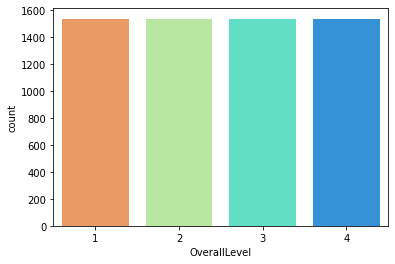

In [52]:
#create a new dataframe with balanced datasets

frames = (lev1_upsample, lev2_upsample, lev_3, lev4_upsample)
bal_df = pd.concat(frames)

fig_szie=(12,8)
sns.countplot(bal_df['OverallLevel'], data = bal_df, palette = 'rainbow_r')

###**FEATURE ENGINEERING TO DO LISTS**

According to the data visualization plots, here are the steps for feature engineering.

GradeEnrolledPct, AttendedPct will be dropped from the data frame to avoid multicollinearity.

TestAge is the student's age on the date of the ELPAC test. For example, for record #1, the student was born on 7/4/2011 and student is 11 year old. TestAge of the student is 6.828340. Since GradeLevel and TestAge are highly correlated and age column was also populated, it's safe to drop the TestAge to avoid multicollinearity.

Other insignificant columns such as 'AcademicYear', 'Stu_deID', 'DOB', 'TestDate' will also be dropped.

Unique value X in 'StudentGender' will be replaced with the mode of each feature column for each train and test data set to avoid data leakage.

Label-encoding will be performed for categorical variables.

Dataset will be split into Train and test dataset.

In [39]:
new_df = df.drop(columns = ['AcademicYear','Stu_deID','DOB','TestAge','GradeEnrolledPct',
                             'AttendedPct','TestDate'])

In [40]:
##replace X value from StudentGender with Mode value for StudentGender column
print(new_df['StudentGender'].mode())
new_df['StudentGender'] = new_df['StudentGender'].replace(to_replace = 'M', value = 'X') #replace X value with mode


0    M
dtype: object


###**LABEL-ENCODING FOR CATEGORICAL VARIABLES**

In [41]:
cat_columns = ['StudentGender','StudentEthnicity','Special_Education','Homeless','SocioEconomically',
               'TestDayName','TeacherGender','TeacherEthnicity']

In [42]:
from sklearn.preprocessing import LabelEncoder

#Train dataset
label_encoders = {}
for column in cat_columns:
  label_encoders[column] = LabelEncoder()
  new_df[column] = label_encoders[column].fit_transform(new_df[column])

In [ ]:
# # Save a version of the clean file
# new_df.to_csv('/Users/oscargil/Desktop/ADS-599B/Data Folder/new_elpac.csv', encoding='utf-8', index=False)

###**DATA PARTITIONING**

Split dataset into 70% train and 30% test datasets.  

In [43]:
from sklearn.model_selection import train_test_split

X = new_df.loc[ : , new_df.columns != 'OverallLevel']
y = new_df[['OverallLevel']]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=700, test_size=0.30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3019, 18) (3019, 1) (1295, 18) (1295, 1)


###**Now the train and test dataset are ready for modelings.**

Text(0.5, 1.0, 'Correlation Heatmap')

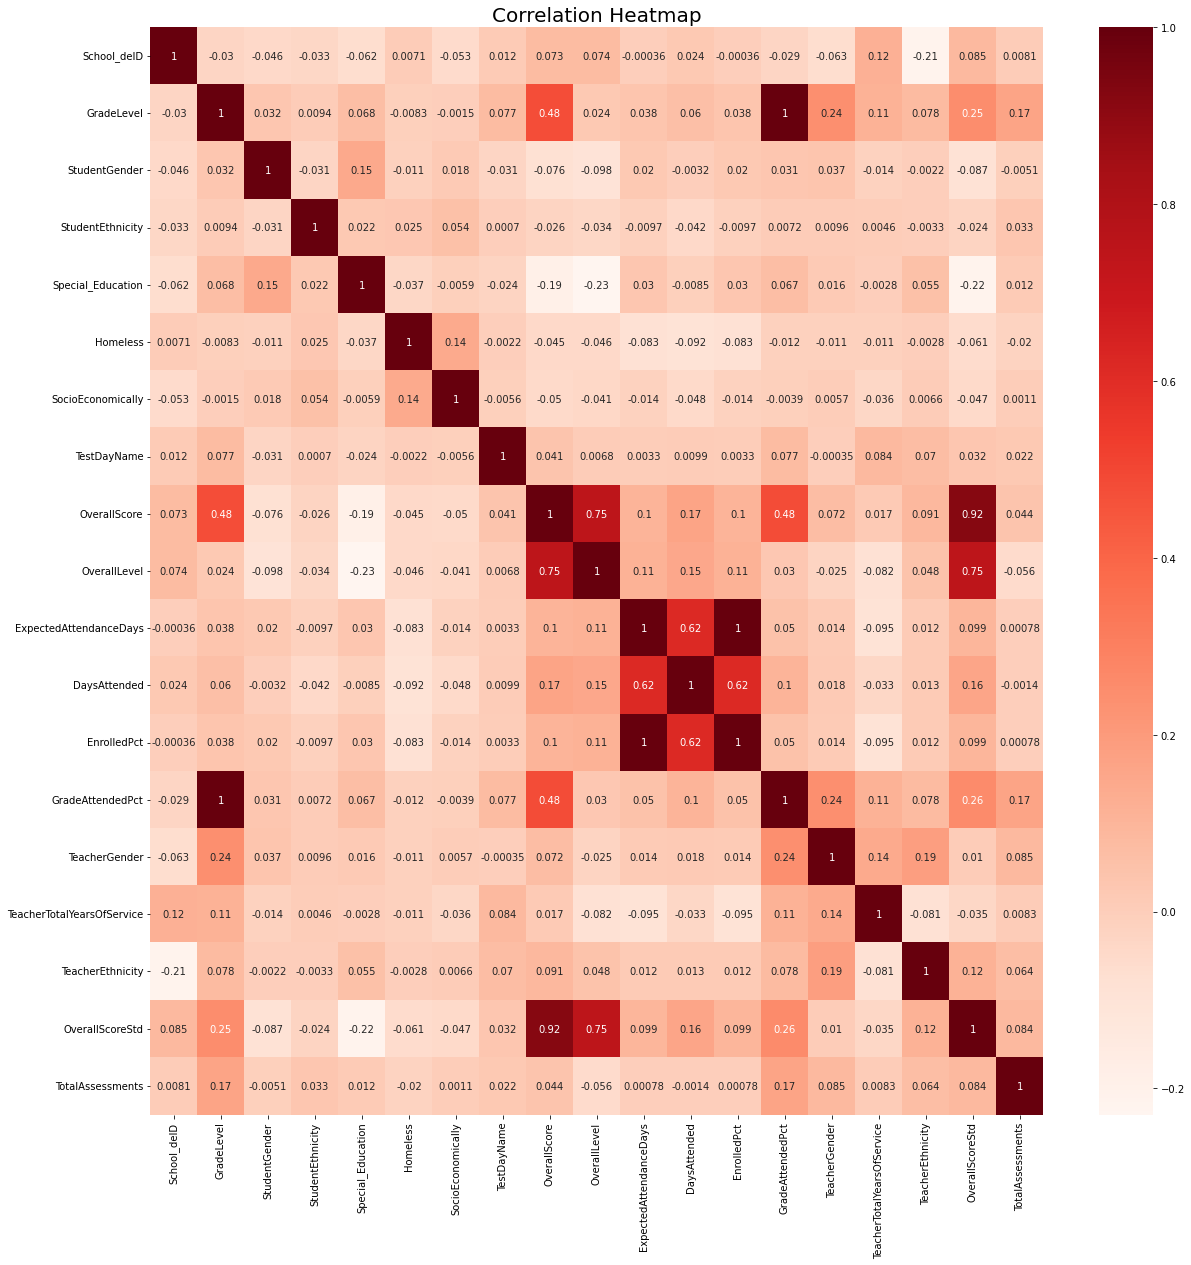

In [45]:
corr = new_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

<AxesSubplot:xlabel='OverallLevel', ylabel='count'>

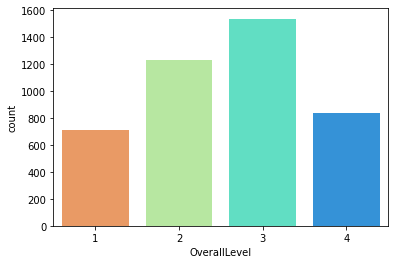

In [54]:
sns.countplot(new_df['OverallLevel'], data = new_df, palette = 'rainbow_r')

<AxesSubplot:xlabel='OverallLevel', ylabel='count'>

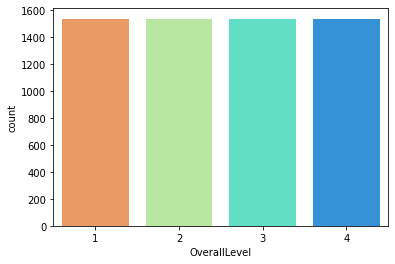

In [55]:
sns.countplot(bal_df['OverallLevel'], data = bal_df, palette = 'rainbow_r')